# 参考にした本、なったページ
- はじめてのパターン認識５章
- 統計的学習の基礎 13.3〜13.5
- <a href="https://qiita.com/SE96UoC5AfUt7uY/items/84c1b4acebb018d09b9c">scikit learnより k近傍法をpythonで実装 - Qiita</a>
    - Pythonでの実装がありわかりやすい
- [k近傍法 \- Wikipedia](https://ja.wikipedia.org/wiki/K%E8%BF%91%E5%82%8D%E6%B3%95)
    - まとまっている
- [k近傍法 \- Pythonと機械学習](http://darden.hatenablog.com/entry/2017/01/28/161916)
    - Pythonでの実装あり
- [機械学習④ K近傍法 \(K\-nearest neighbor\) まとめ \- Qiita](https://qiita.com/kibinag0/items/d745d30b6b3f231cb1c7)
- [K近傍法（クラス分類 ）（KNeighbors Classifier）【Pythonとscikit\-learnで機械学習：第4回】](http://neuro-educator.com/ml4/)
- [scikit\.learn手法徹底比較！ K近傍法編 \- Risky Dune](http://d.hatena.ne.jp/saket/20130213/1360747549)
    

# 3.7 k近傍法：怠惰学習アルゴリズム(89ページ)

k近傍法分類機（k-nearest neighbor cassifier、KNN)

KNNは怠惰学習（lazy learner）の代表的な例である。
- 「怠惰」と呼ばれるのは、トレーニングデータセットから識別関数を学習せず、トレーニングデータセットを暗記するためだ。

## KNNアルゴリズム
1. kの値と距離指標を選択する。
2. 分類したいサンプルからk個最近傍のデータ点を見つけ出す。
3. 多数決によりクラスラベルを割り当てる。



k = 5の場合の例  
<img src="download-3.png" width = 300 align=left >




５つの最近傍のデータ点での多数決に基づき、新しいデータ点？に三角形のクラスラベルが割り当てられる。


In [5]:
%matplotlib inline

In [6]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [7]:
from sklearn.model_selection import train_test_split
# トレーニングデータとテストデータに分割する
# 全体の30%をテストデータにする
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

#from sklearn.cross_validation import train_test_split
# このモジュールは0.20で削除される予定

In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
# トレーニングデータの平均と標準偏差を計算
sc.fit(X_train)
# 平均と標準偏差を用いて標準化
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [9]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # マーカーとカラーマップの準備
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 決定領域のプロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # グリッドポイントの作成
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    # 各特徴量を１次元配列に変換して予測を実行
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # 予測結果を元のグリッドポイントのデータサイズに変換
    Z = Z.reshape(xx1.shape)
    # グリッドポイントのb等高線のプロット
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    # 軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # クラスごとにサンプルをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # テストサンプルを目立たせる、（点をまるで表示）
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

In [10]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

/Users/purin/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/purin/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


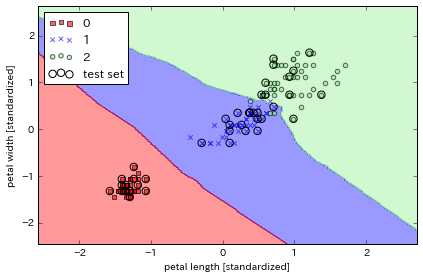

In [11]:
from sklearn.neighbors import KNeighborsClassifier

# k近傍法のインスタンスを生成
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train) # k近傍法のモデルにトレーニングデータを適合させる

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/k_nearest_neighbors.png', dpi=300)
plt.show()

- 多数決が同数の場合、sickit-learnのkNNアルゴリズムの実装では、サンプルまでの距離がより近いものが優先される。
- 服薄の近傍が同じような距離にある場合は、トレーニングデータセットにおいて最初に現れるクラスラベルが選択される